<p align="center">
    <img src="https://github.com/whghdrms/CNN_Classifier_MPS/blob/master/Untitled.png?raw=true" width="220" height="240" />

</p>

## NSC 325 Inventors Program Practicum 

## Basics in Coding for Data Preprocessing, Statistical Analysis, and ML applications  

#### Jesse Pisel (Professor), Ryan Kohanski (TA), Anjali Sridharan (TA), and Honggeun Jo (TA)
 
This workflow demonstrate ML applications of **Rod Pump** project. As this is not only specifically for one project, we may expand some of below applications to any proejct topic or data. If you have any questions or comments, please feel free to reach Dr. Pisel or TAs.


# 1. Import packages and data & Clean data
Fist of all, we need to load the required libraries, such as 

* [numpy](https://numpy.org/): To generate arrays <br>
* [matplotlib](https://matplotlib.org/): Vilsualization purpose <br>
* [seaborn](https://seaborn.pydata.org/): Distribution plots <br>
* os: to update working directory
* [pandas](https://pandas.pydata.org/docs/user_guide/index.html): DataFrames for tabular data.
* [missingno](): Visualize missing values in dataframe

In [1]:
# Load library:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import seaborn as sns
import pandas as pd
import os
# import missingno as msnao 
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, StandardScaler

# Change working directory, if needed:
# os.chdir('__directories__')

In [2]:
# Load DataFrame
df = pd.read_csv('UT_RodPump_Dataset/rodpump_failure.csv')

# Get life span of rod pump
df['lifespan'] = (pd.to_datetime(df.lifetime_end) - pd.to_datetime(df.lifetime_start))/ pd.Timedelta('1 days')

# Get subset of df whose failure type is not null
df = df[df['FAILURETYPE'].notnull()]
 

In [3]:
# List of columns in dataframe
df.columns

Index(['roduid', 'UWI', 'NODEID', 'IDWELL', 'tbguid', 'lifetime_start',
       'lifetime_end', 'IDRECJOBPULL', 'REPORTTO', 'FAILSTART', 'FAILURETYPE',
       'H2S_CONCENTRATION', 'PrimarySetpoint', 'SecondarySetpoint',
       'StrokeLength', 'GrossStrokeLength', 'Fillage', 'YesterdaysAverageSPM',
       'bha_configuration', 'chemgroup1_any', 'chemgroup1_all',
       'chemgroup2_any', 'chemgroup2_all', 'chemgroup3_any', 'chemgroup3_all',
       'max_unguided_dls', 'dls_high_in_hole', 'gas_anchor_length',
       'MAX_INCLINATION', 'wellbore_category', 'manual_scale', 'packer_vs_tac',
       'AVG_PRESS_FLOWLINE', 'AVG_PRESSURE_TUBING', 'AVG_PRESSURE_CASING',
       'AVG_DIFFERENTIAL_PRESSURE', 'AVG_OIL_VOLUME', 'AVG_WATER_VOLUME',
       'AVG_LIQUID_VOLUME', 'AVG_WATERSG', 'rod_sinker_type', 'rod_has_guides',
       'rod_make', 'rod_apigrade', 'ROUTE', 'overall_max_sideload',
       'shallow_max_sideload', 'max_unguided_sideload', 'DESANDDEGAS_TYP',
       'CHROME_LENGTH', 'ENDURALLOY_LEN

In [4]:
# Selecte valid columns
list_all = []
list_WellUID = ['roduid']
list_Target = ['lifespan', 'FAILURETYPE']
list_predictor = ['H2S_CONCENTRATION', 'PrimarySetpoint', 'SecondarySetpoint', 'StrokeLength',
                 'GrossStrokeLength', 'Fillage', 'bha_configuration', 
                 'max_unguided_dls', 'dls_high_in_hole', 'gas_anchor_length',
                 'MAX_INCLINATION', 'manual_scale', 'packer_vs_tac', 
                 'AVG_PRESS_FLOWLINE', 'AVG_PRESSURE_TUBING', 'AVG_PRESSURE_CASING',
                 'AVG_OIL_VOLUME', 'AVG_WATER_VOLUME', 'AVG_LIQUID_VOLUME',
                 'rod_sinker_type', 'rod_has_guides', 'rod_make','rod_apigrade',
                 'ROUTE', 'overall_max_sideload', 'shallow_max_sideload', 'max_unguided_sideload',
                 'DESANDDEGAS_TYP', 'NIPPLE_SET_DEPTH', 'pump_bore']
list_all.extend(list_WellUID);
list_all.extend(list_Target); 
list_all.extend(list_predictor);

df = df.loc[:,list_all]

In [5]:
# Check type of predictor feature
print('Name and type of varialbes are: \n')
print(df.dtypes)
print('\nThe number of variables is %d' %len(df.columns))
print('...The number of categorical variables is %d' %(df.shape[1] - sum(df.dtypes=='float64') - sum(df.dtypes=='int64'))) # <- Count object type (Categorical variable) 
print('...The number of continuous variable is %d' %(sum(df.dtypes=='float64') + sum(df.dtypes=='int64'))) # <- Count float type (Continuos variable)

list_predictor_continuous = []
list_predictor_categorical = []

for name in df.columns[3:]:
    if df[name].dtype == 'float64' or df[name].dtype == 'int64':
        list_predictor_continuous.append(name)
    else:
        list_predictor_categorical.append(name)

print('List of continuous predictor:')
print(list_predictor_continuous)
print('List of categorical predictor:')
print(list_predictor_categorical)

Name and type of varialbes are: 

roduid                    object
lifespan                 float64
FAILURETYPE               object
H2S_CONCENTRATION        float64
PrimarySetpoint          float64
SecondarySetpoint        float64
StrokeLength             float64
GrossStrokeLength        float64
Fillage                  float64
bha_configuration         object
max_unguided_dls         float64
dls_high_in_hole         float64
gas_anchor_length        float64
MAX_INCLINATION          float64
manual_scale              object
packer_vs_tac             object
AVG_PRESS_FLOWLINE       float64
AVG_PRESSURE_TUBING      float64
AVG_PRESSURE_CASING      float64
AVG_OIL_VOLUME           float64
AVG_WATER_VOLUME         float64
AVG_LIQUID_VOLUME        float64
rod_sinker_type           object
rod_has_guides              bool
rod_make                  object
rod_apigrade              object
ROUTE                      int64
overall_max_sideload     float64
shallow_max_sideload     float64
max_ungui

---------------------------

In [6]:
# Drop missing values
df = df.dropna(inplace=False, axis=0);

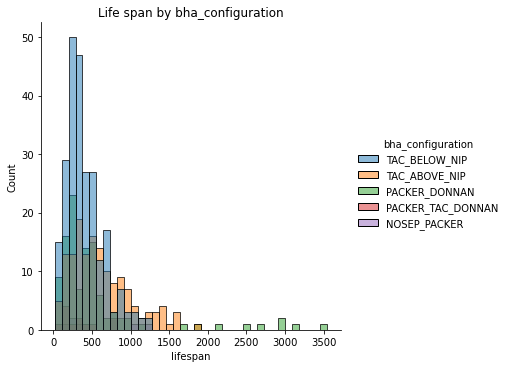

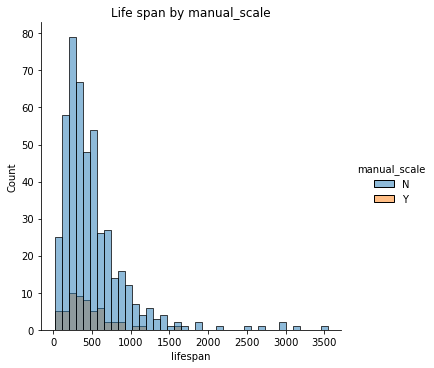

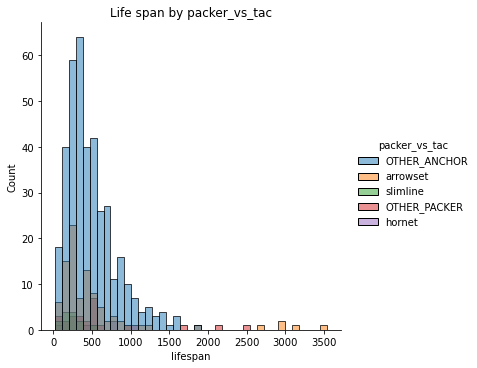

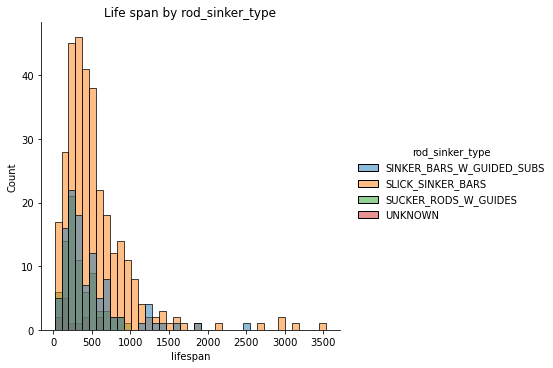

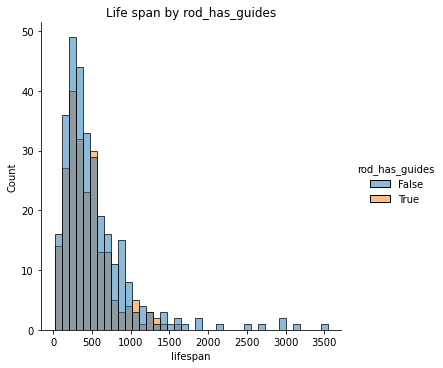

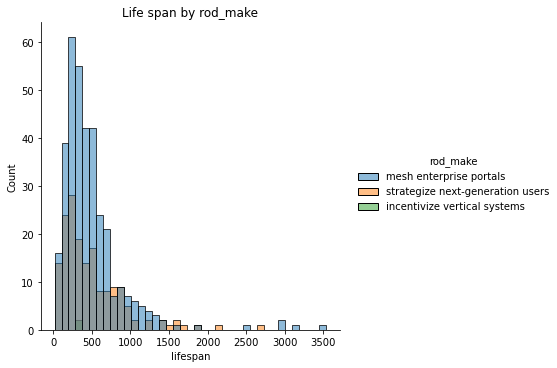

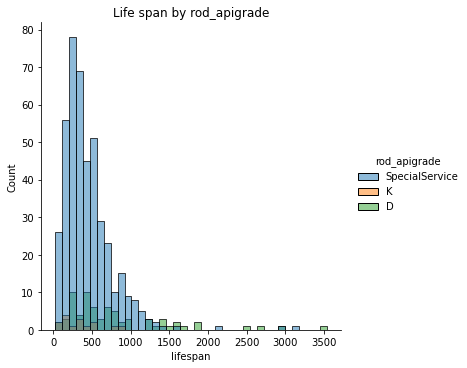

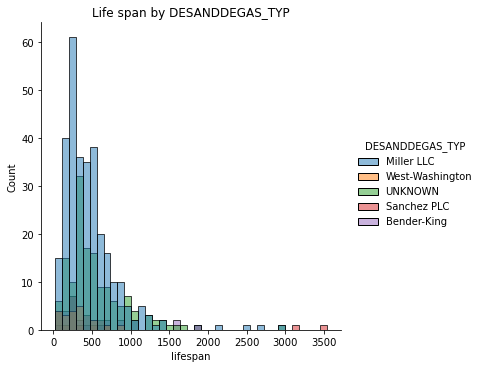

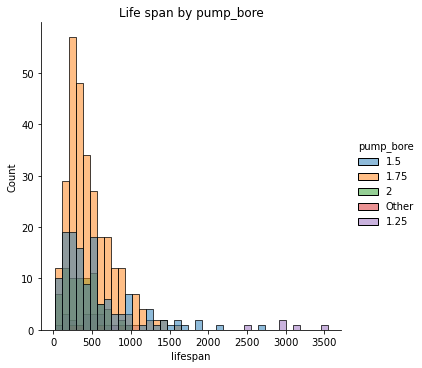

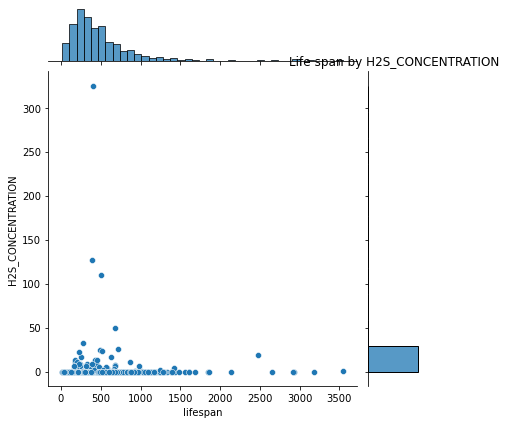

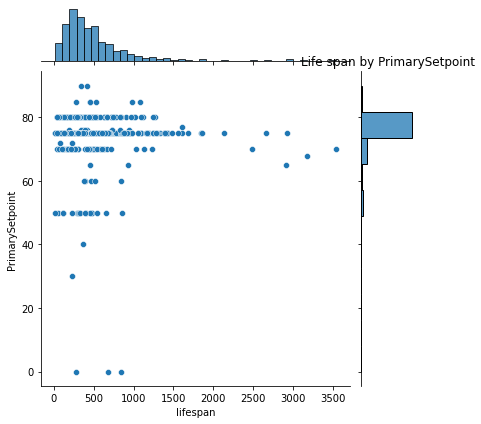

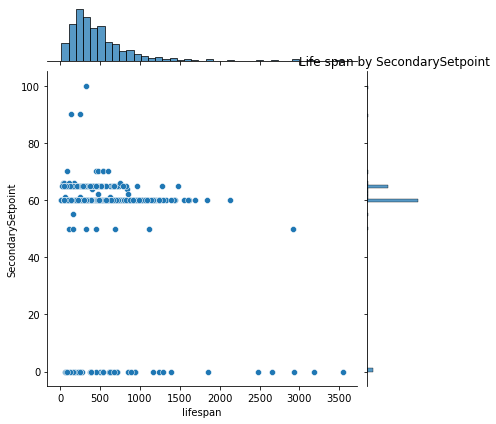

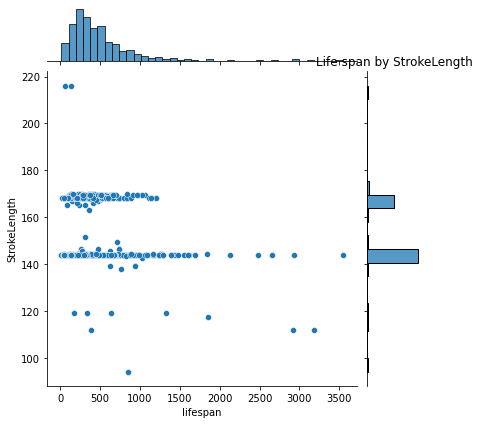

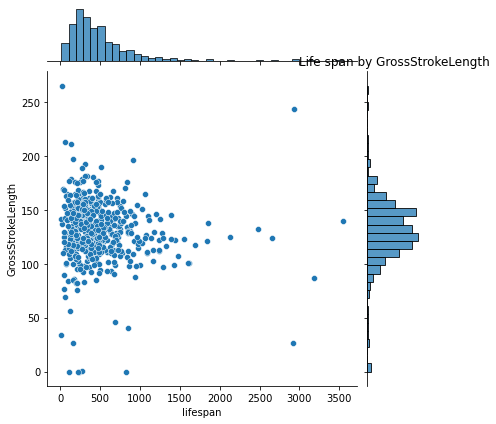

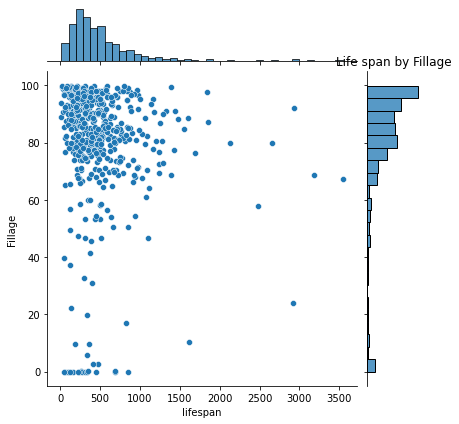

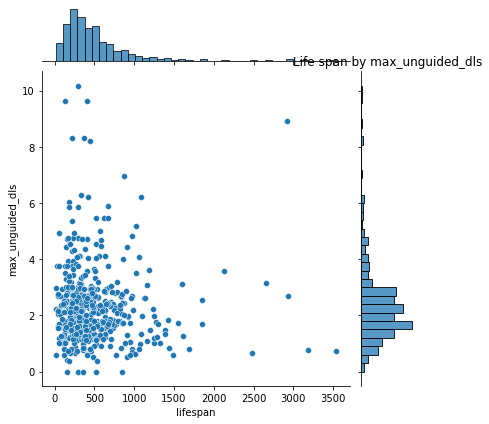

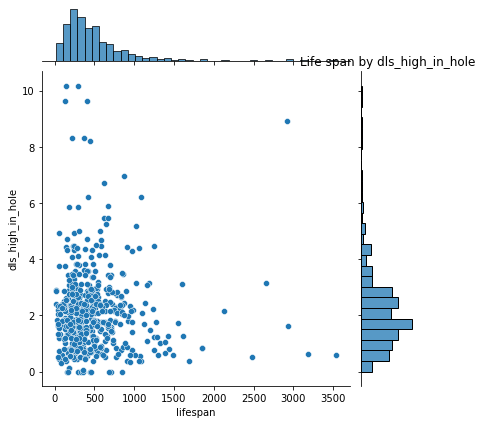

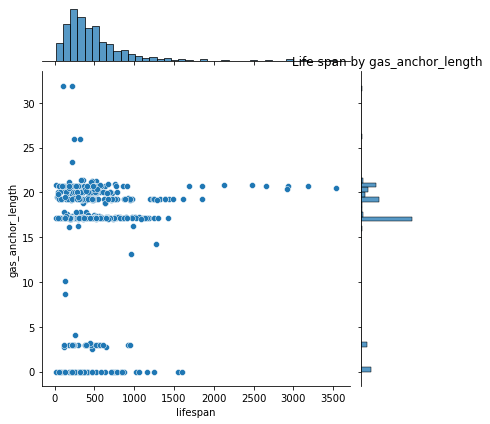

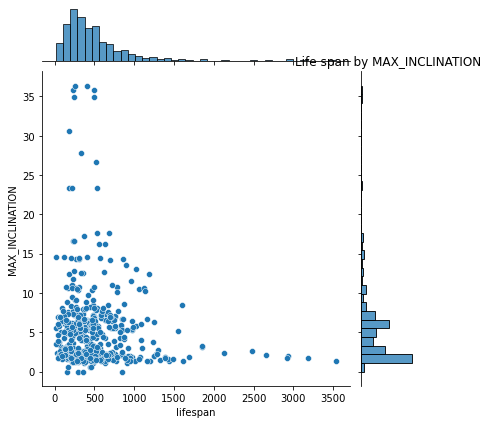

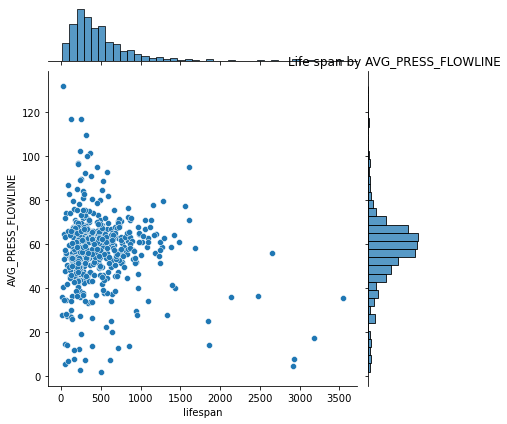

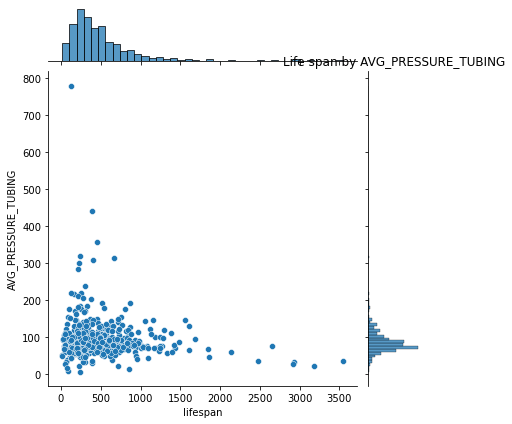

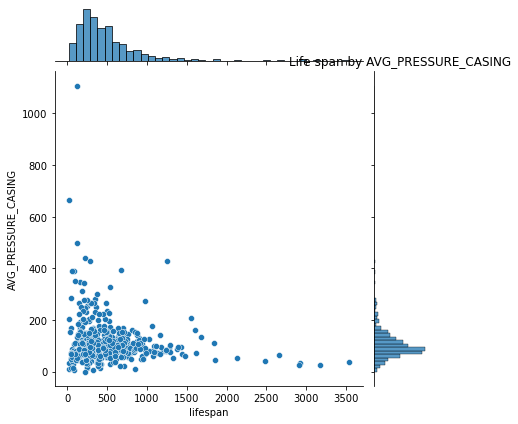

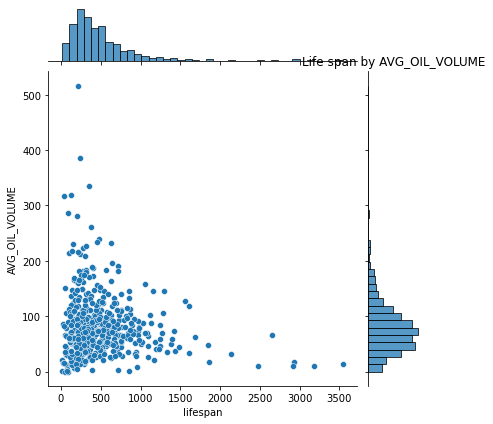

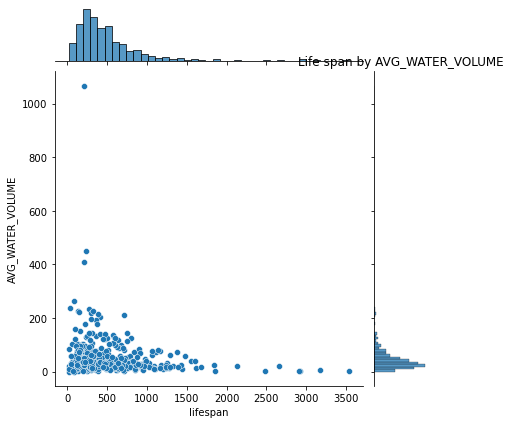

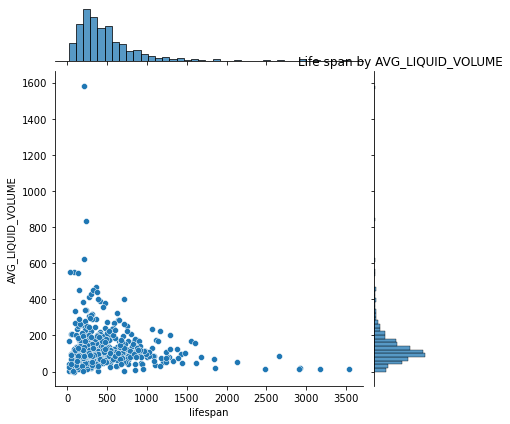

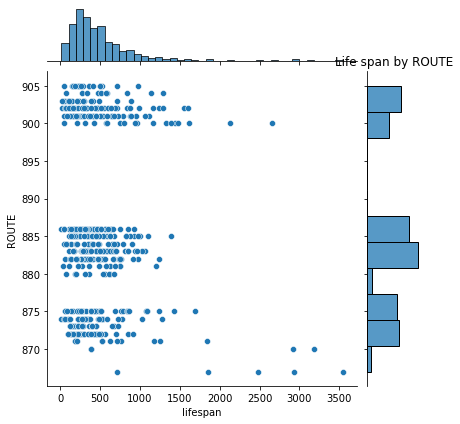

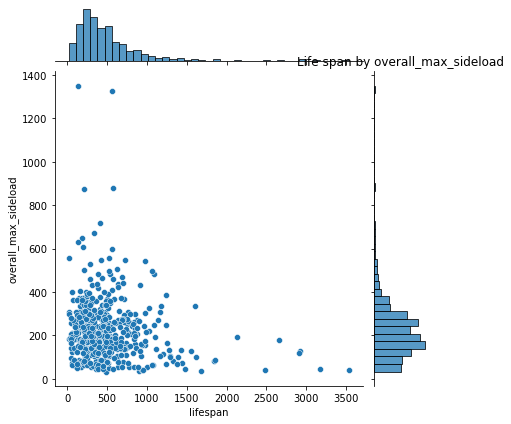

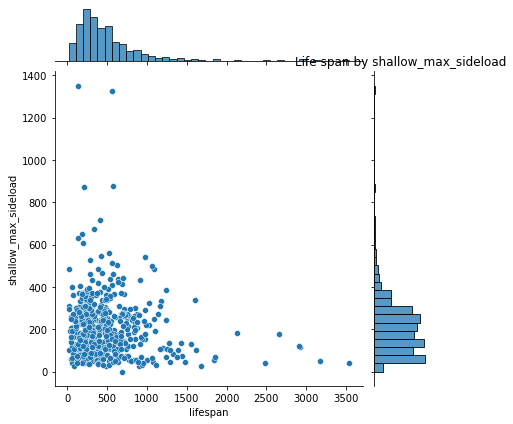

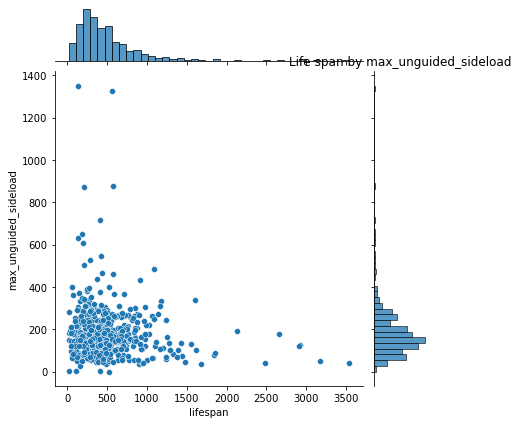

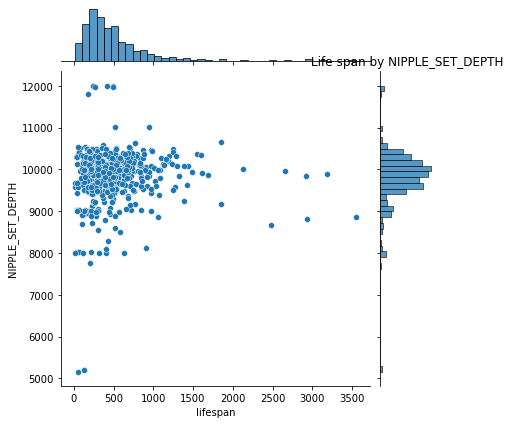

In [304]:
# Feature selection from visual inspection - Life span
for name in list_predictor_categorical:
    # Compare lifespans depending on Categorical variable
    sns.displot(data = df, x = 'lifespan', hue = name)
    plt.title('Life span by %s' %name);    
for name in list_predictor_continuous:
    # Compare lifespans depending on continuous variable
    sns.jointplot(data=df, x="lifespan", y = name)
    plt.title('Life span by %s' %name);


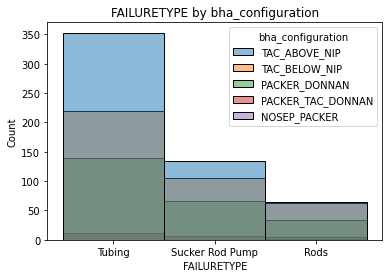

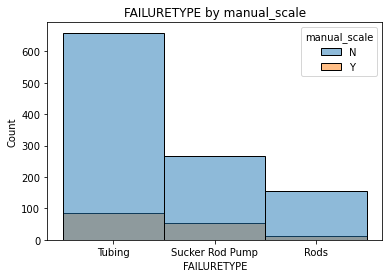

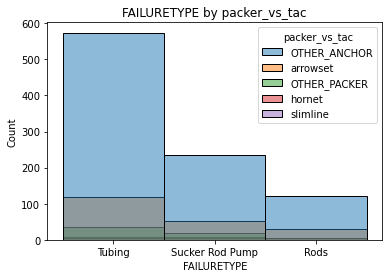

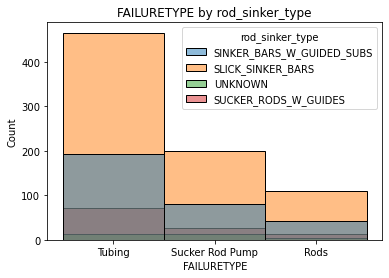

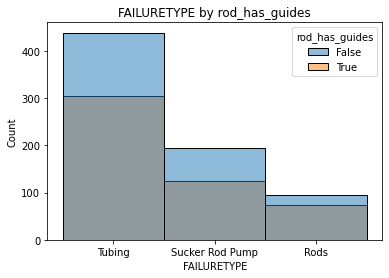

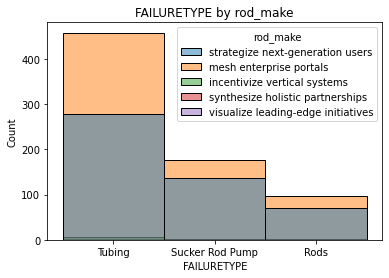

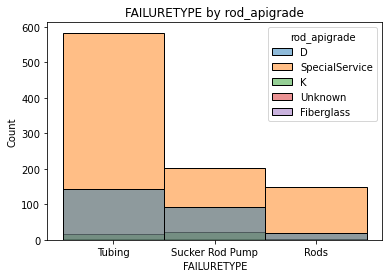

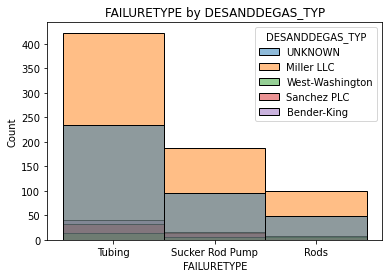

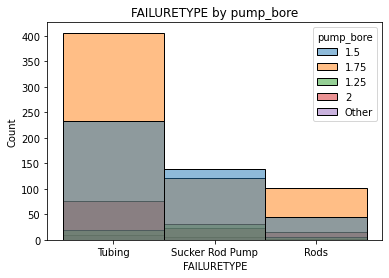

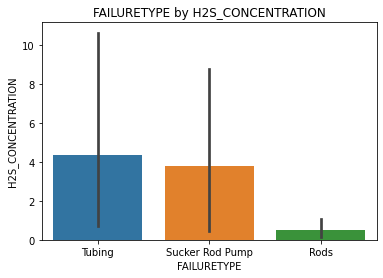

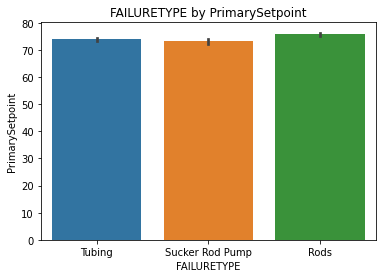

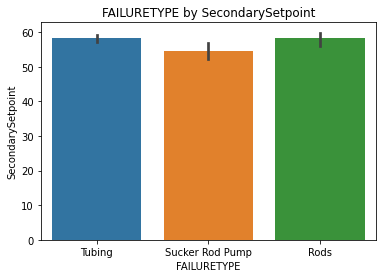

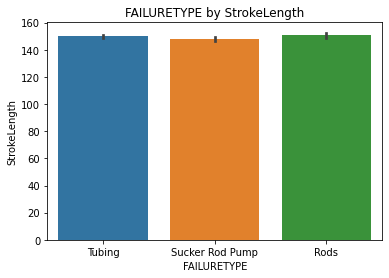

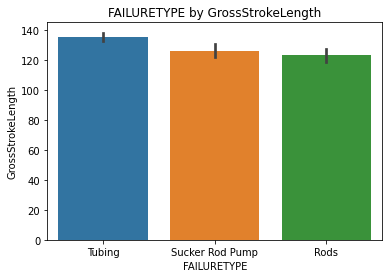

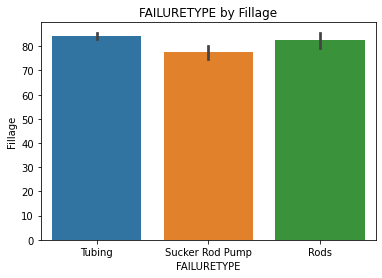

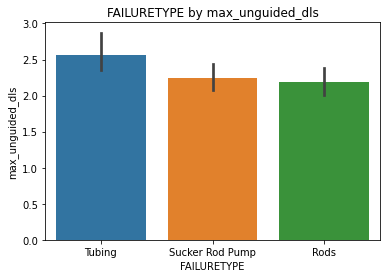

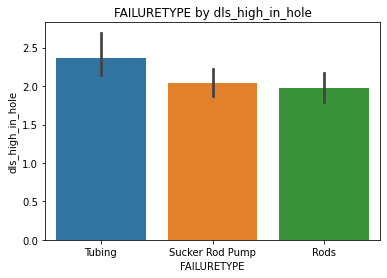

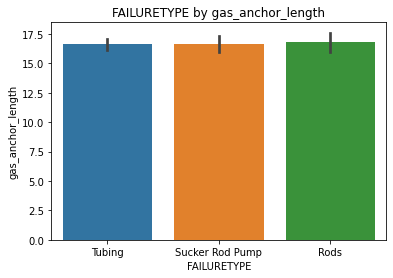

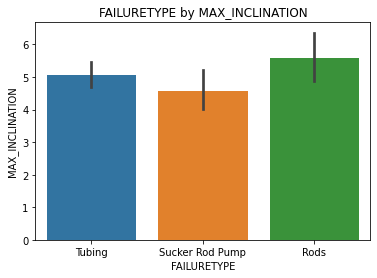

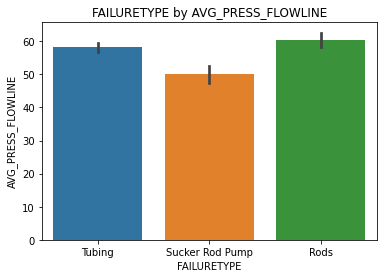

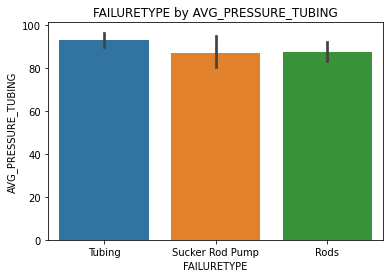

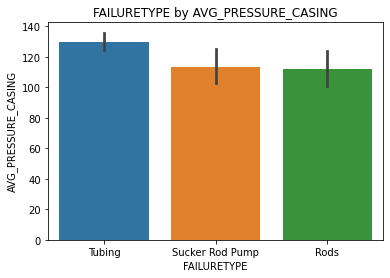

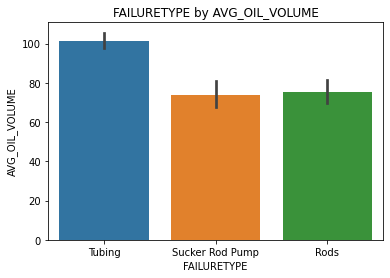

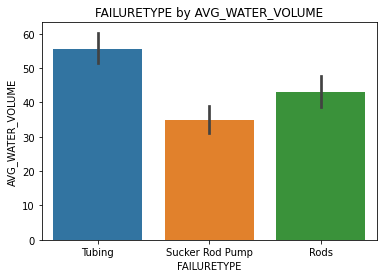

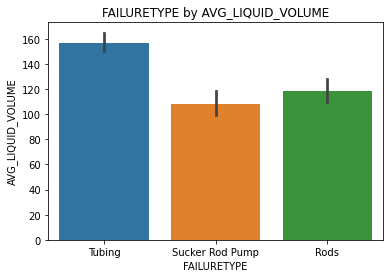

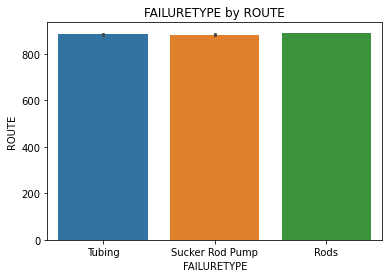

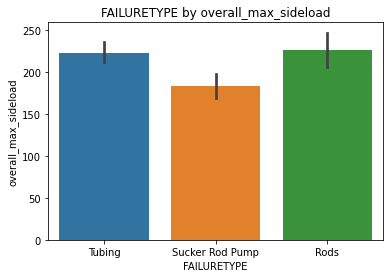

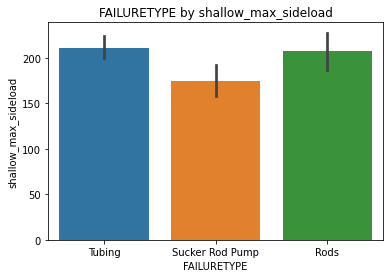

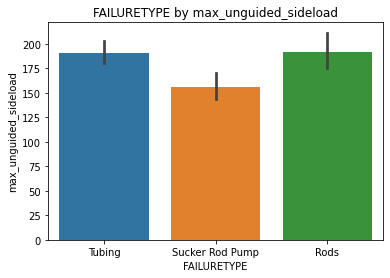

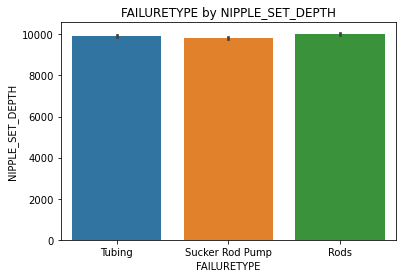

In [163]:
# Feature selection from visual inspection - Failure Type
for name in list_predictor_categorical:
    # Compare failure type depending on categorical variable
    plt.figure()
    sns.histplot(df, x="FAILURETYPE", hue = name, common_norm = False)
    plt.title('FAILURETYPE by %s' %name);
for name in list_predictor_continuous:
    # Compare failure type depending on continuous variable
    plt.figure()
    sns.barplot(data=df, x='FAILURETYPE' , y=name)
    plt.title('FAILURETYPE by %s' %name);


In [7]:
# Remove irrelevant predictor features:
list_predictor_continuous.remove('NIPPLE_SET_DEPTH')
list_predictor_continuous.remove('ROUTE')

In [8]:
# Remove Outliers
df = df.loc[df['Fillage'] < 300,:]

---------------------------

# 2. Statistical Analysis
* Summary statistics
* Univarite & bivariate analysis
* Spatial Distribution
* Outlier detection (not included)

In [9]:
# Summary statistics
df.describe()

lifespan  H2S_CONCENTRATION  PrimarySetpoint  SecondarySetpoint  \
count   520.000000         520.000000       520.000000         520.000000   
mean    486.342308           1.960577        74.034615          57.250000   
std     421.078181          16.441982         8.368371          16.277667   
min      16.000000           0.000000         0.000000           0.000000   
25%     231.000000           0.000000        75.000000          60.000000   
50%     381.000000           0.000000        75.000000          60.000000   
75%     602.250000           0.000000        75.000000          65.000000   
max    3542.000000         325.000000        90.000000         100.000000   

       StrokeLength  GrossStrokeLength     Fillage  max_unguided_dls  \
count    520.000000         520.000000  520.000000        520.000000   
mean     152.244810         130.510007   80.824688          2.318366   
std       13.335971          28.510880   21.363310          1.361774   
min       94.137931           0.000000    0.000000          0.000000   
25%      144.000000         116.101536   77.128122          1.500000   
50%      144.039993         130.721768   85.820835          2.107417   
75%      168.020004         147.402187   95.003571          2.721818   
max      216.119995         265.428571   99.900002         10.170000   

       dls_high_in_hole  gas_anchor_length  ...  AVG_PRESSURE_TUBING  \
count        520.000000         520.000000  ...           520.000000   
mean           2.149047          16.056212  ...            91.846054   
std            1.483057           6.303087  ...            52.902042   
min            0.000000           0.000000  ...             6.300955   
25%            1.186608          17.120000  ...            68.976277   
50%            1.860000          17.170000  ...            81.187766   
75%            2.719438          19.310000  ...            99.875603   
max           10.170000          31.910000  ...           778.412500   

       AVG_PRESSURE_CASING  AVG_OIL_VOLUME  AVG_WATER_VOLUME  \
count           520.000000      520.000000        520.000000   
mean            112.887909       83.368079         49.616672   
std              83.118975       55.762379         65.112648   
min               0.188793        0.000000          0.000000   
25%              73.206963       48.898377         20.664552   
50%              93.688165       73.825394         35.018803   
75%             127.784029      102.679153         57.667421   
max            1107.539063      516.219455       1066.565759   

       AVG_LIQUID_VOLUME       ROUTE  overall_max_sideload  \
count         520.000000  520.000000            520.000000   
mean          132.984566  885.259615            223.239269   
std           112.123344   11.016186            141.293859   
min             0.023529  867.000000             33.480000   
25%            77.674221  875.000000            136.715000   
50%           112.355670  883.000000            200.985000   
75%           159.275659  900.000000            278.820000   
max          1582.785214  905.000000           1351.030000   

       shallow_max_sideload  max_unguided_sideload  NIPPLE_SET_DEPTH  
count            520.000000             520.000000        520.000000  
mean             208.928923             182.396885       9814.288846  
std              143.657935             128.437302        621.480331  
min                0.000000               0.000000       5166.100000  
25%              113.965000             113.942500       9582.675000  
50%              192.540000             156.550000       9893.750000  
75%              272.027500             224.440000      10141.125000  
max             1351.030000            1351.030000      12002.300000  

[8 rows x 22 columns]

C:\Users\jhg13\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


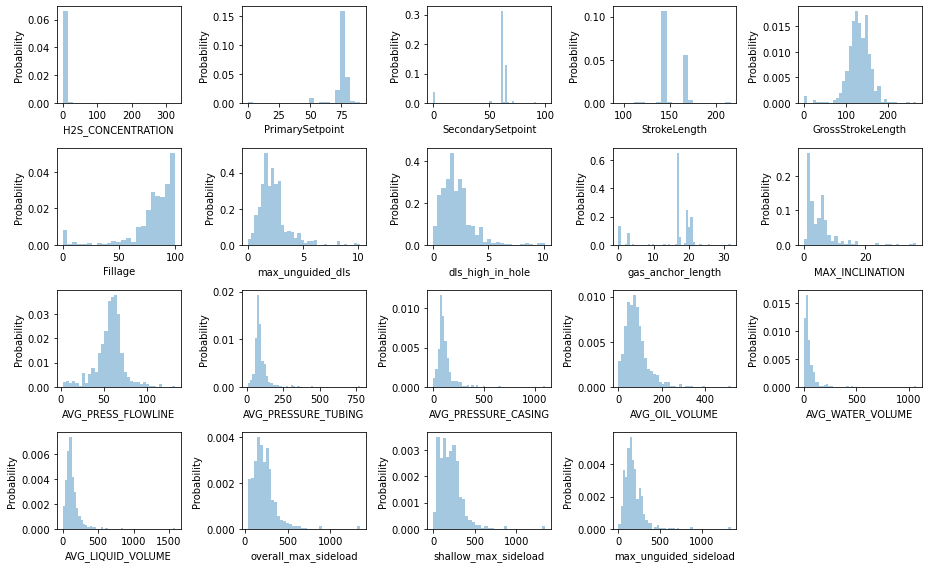

In [10]:
# Marginal distributions of variables: https://seaborn.pydata.org/generated/seaborn.distplot.html
plt.figure(figsize = (13,8))
for i, name in enumerate(list_predictor_continuous):
    plt.subplot(4,5,i+1);
    sns.distplot(df.loc[:,name], kde = False, norm_hist = True)
    plt.ylabel('Probability')
plt.tight_layout()

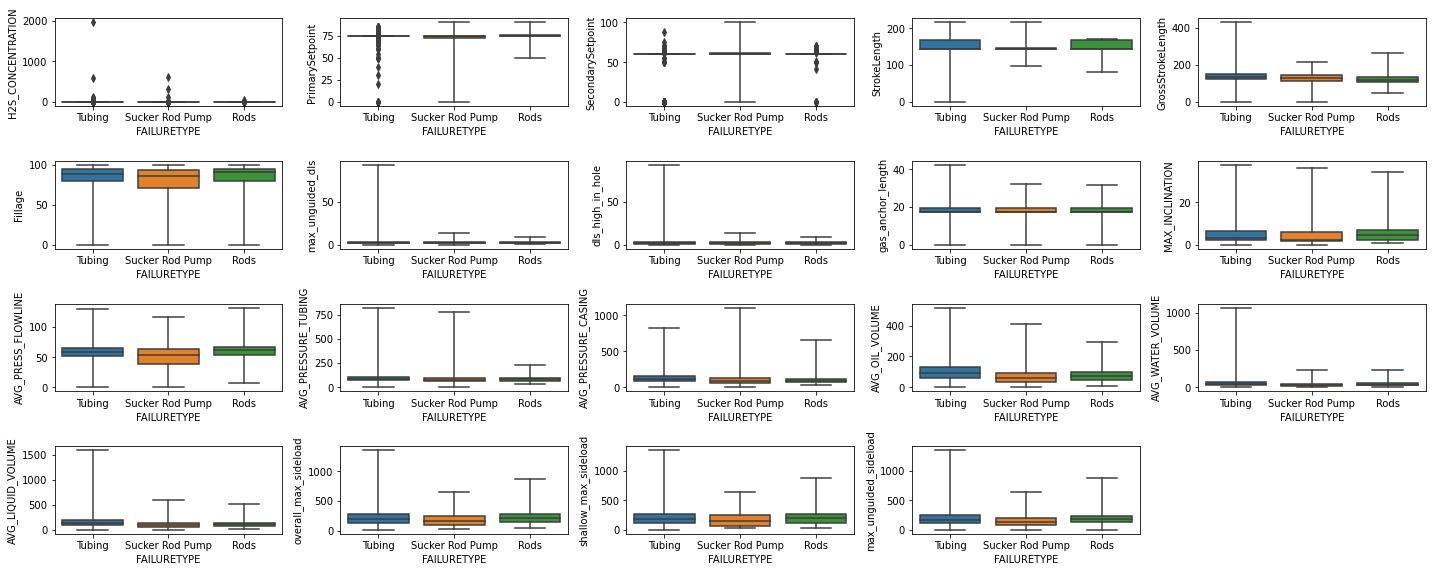

In [167]:
# Box plot of variables: https://seaborn.pydata.org/generated/seaborn.boxplot.html
plt.figure(figsize = (20,8))
for i, name in enumerate(list_predictor_continuous):
    plt.subplot(4,5,i+1);
    sns.boxplot(x = "FAILURETYPE",y = name, data = df, whis= 100) # Default for whisker size = 1.5
plt.tight_layout()

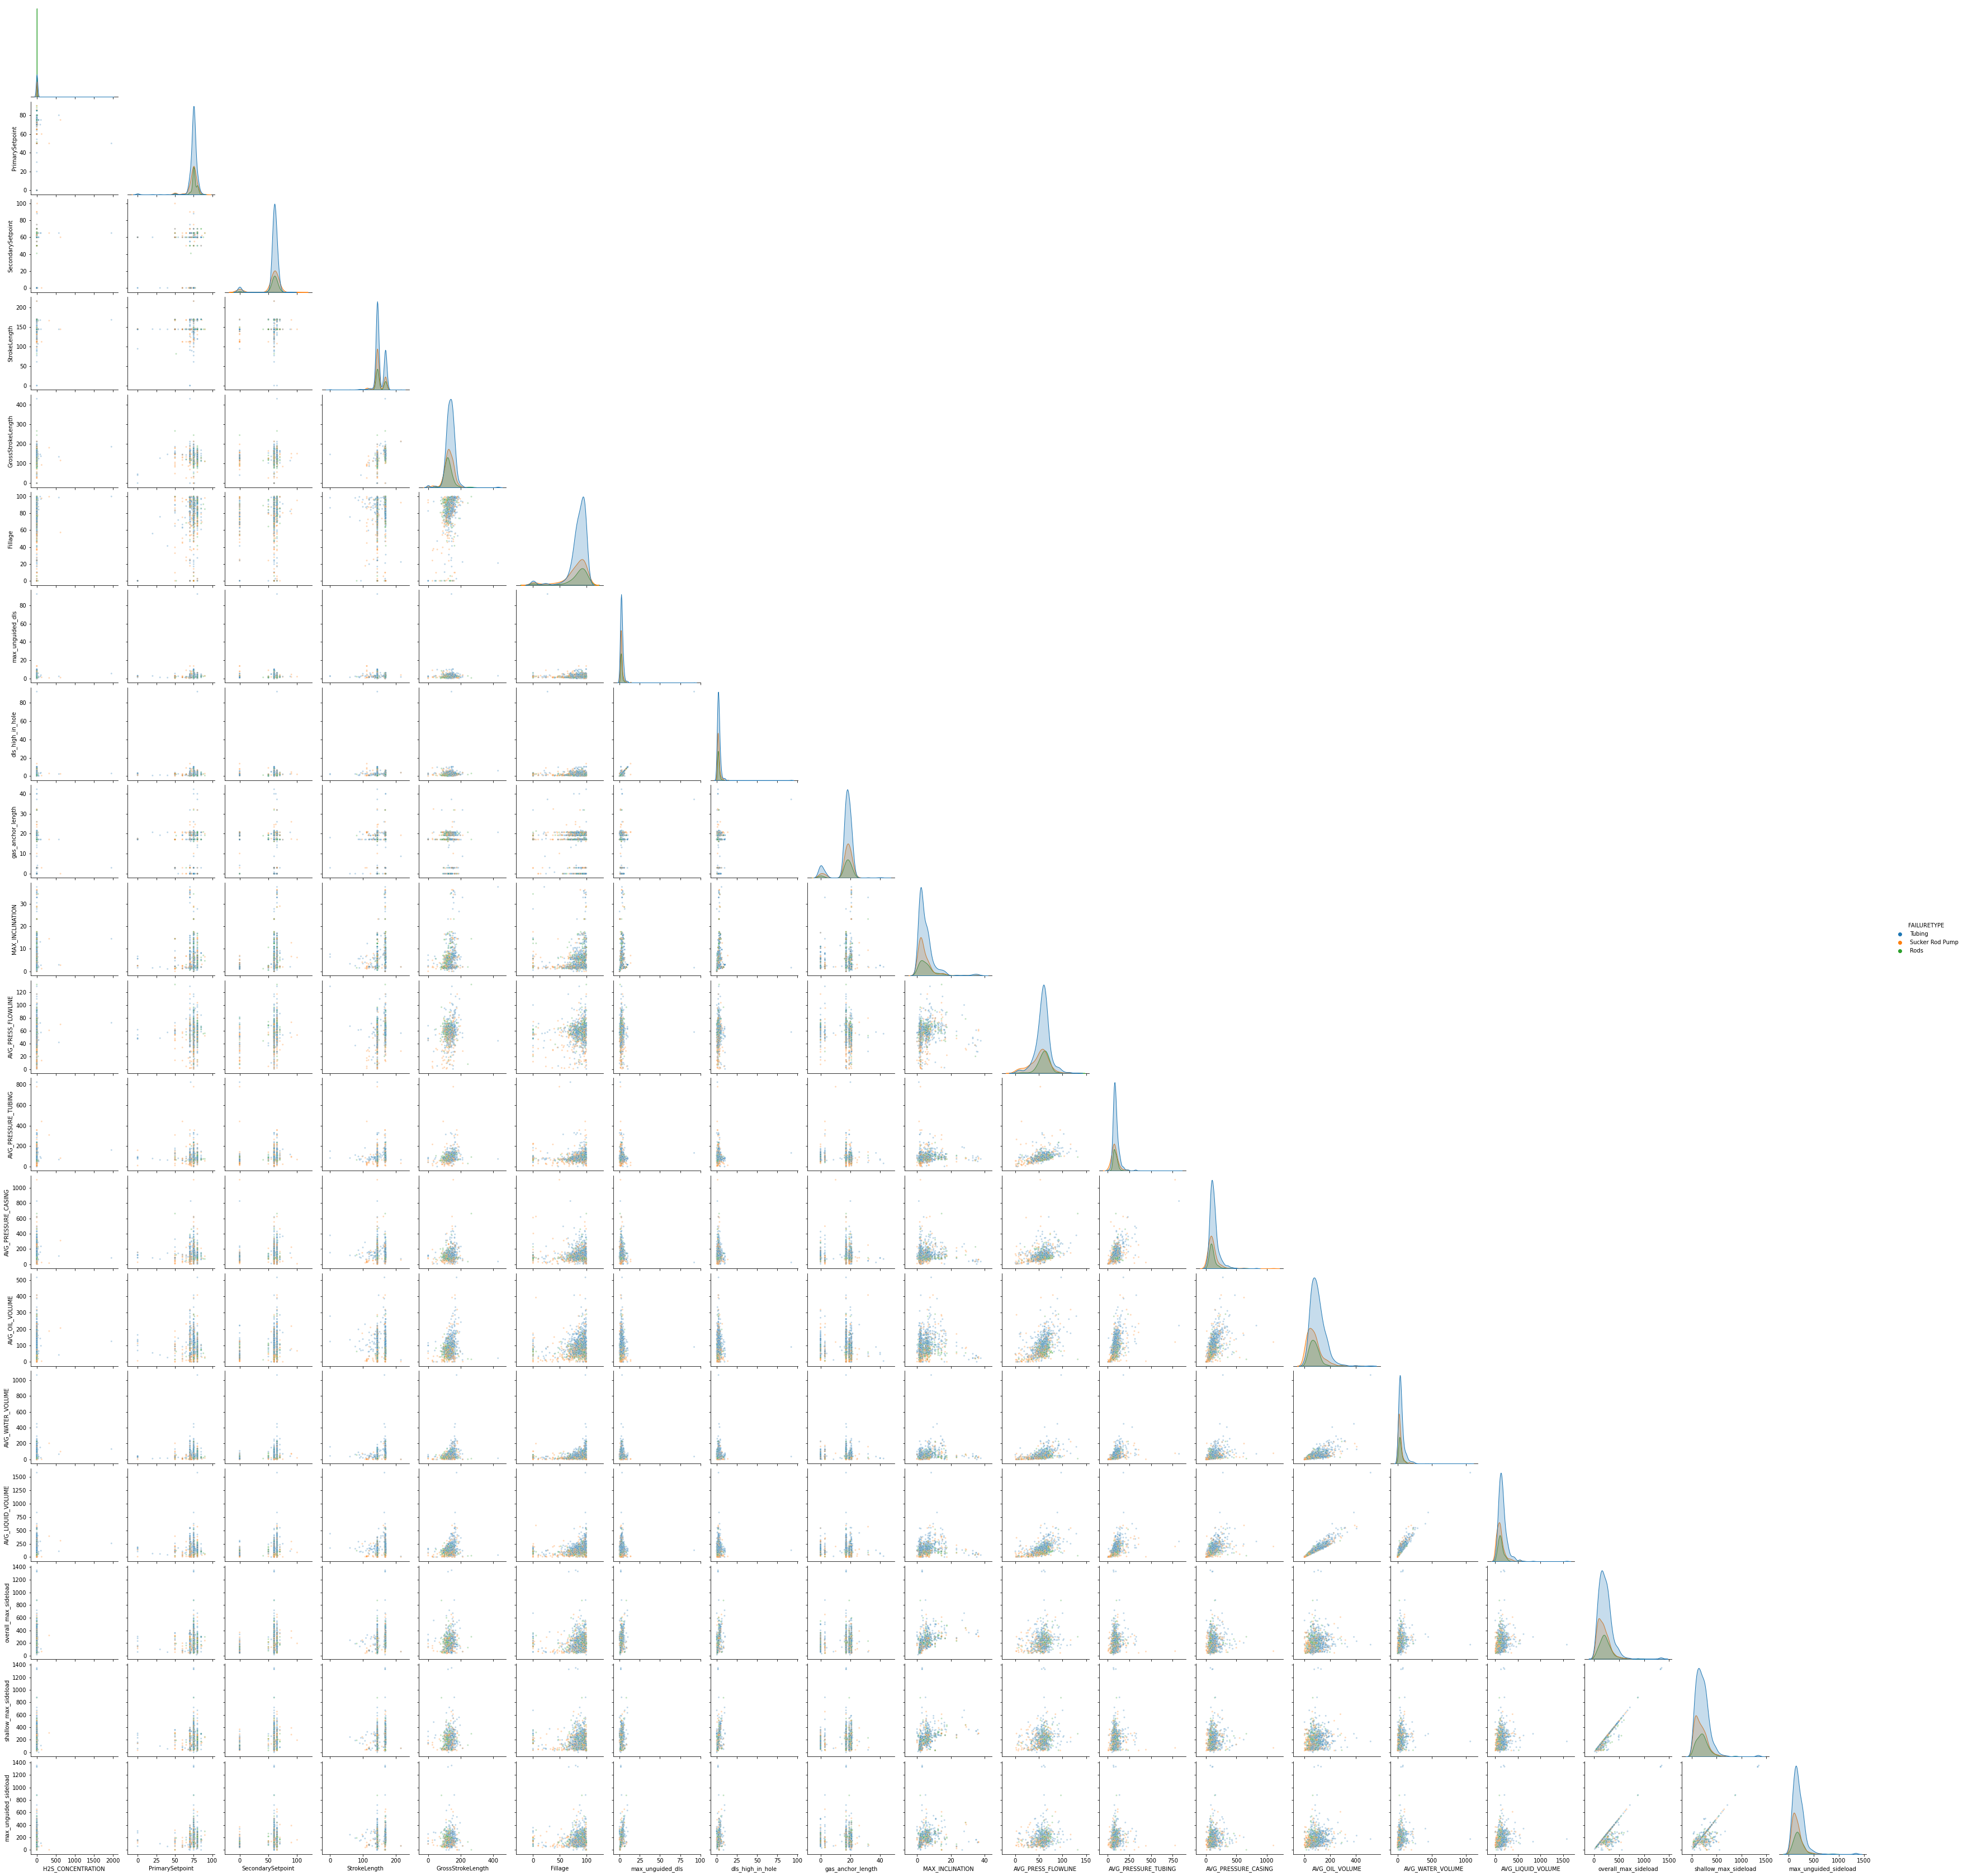

In [180]:
# bivariate scatter plot: https://seaborn.pydata.org/generated/seaborn.pairplot.html
list_ = list_predictor_continuous.copy(); list_.append('FAILURETYPE')
sns.pairplot(df.loc[:,list_], hue = 'FAILURETYPE', corner=True, plot_kws = dict(alpha = 0.3, marker = '.'))

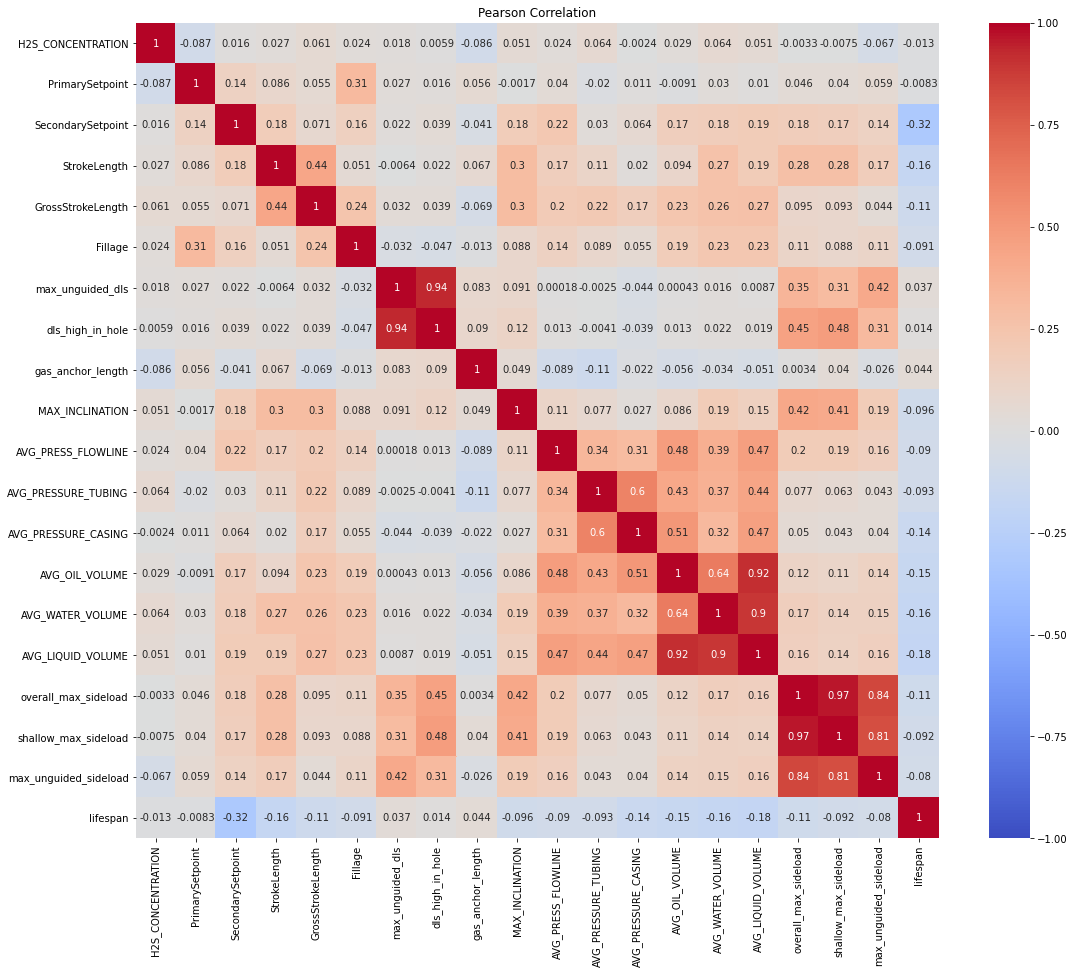

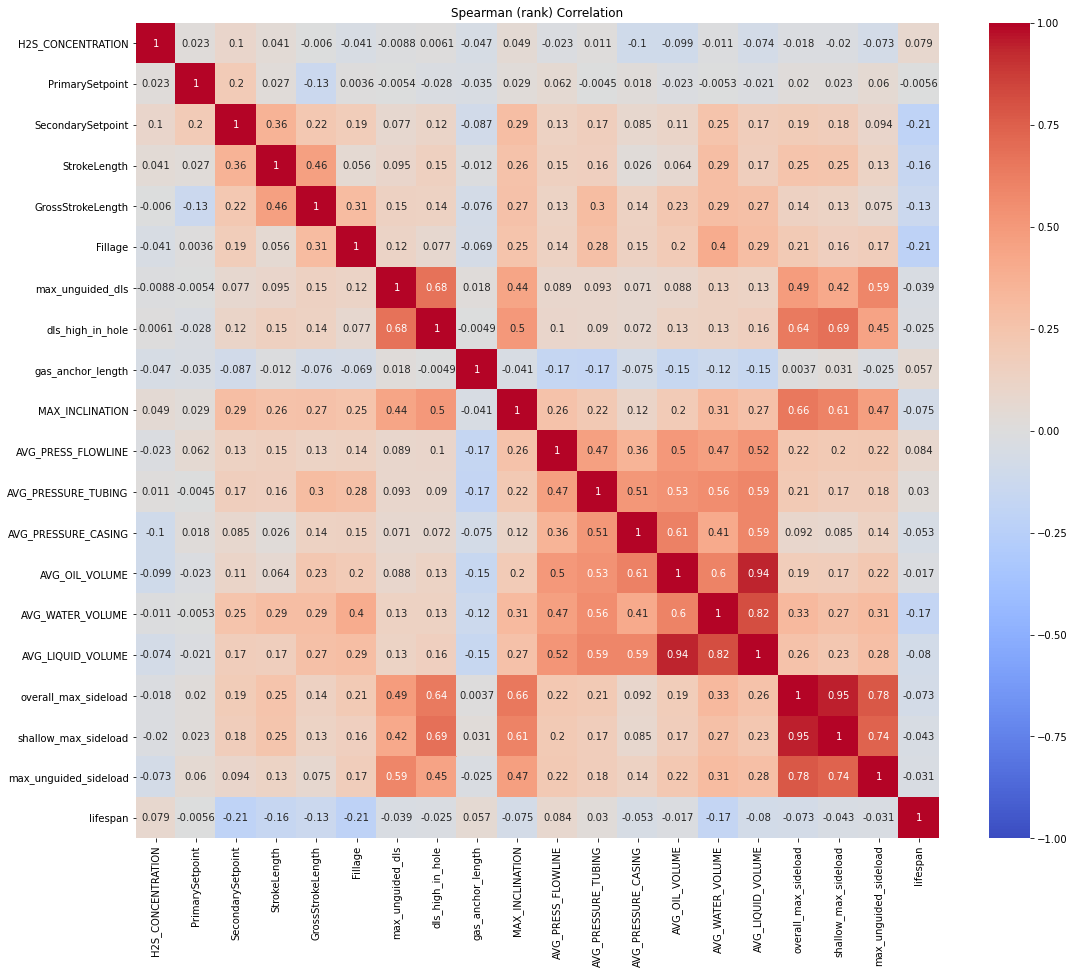

In [184]:
# Correlation Coefficient Matrix (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)
list_ = list_predictor_continuous.copy(); list_.append('lifespan')
plt.figure(figsize = (18,15))
plt.title('Pearson Correlation')
sns.heatmap(df.loc[:,list_].corr(method='pearson'), vmin=-1, vmax = 1, cmap='coolwarm', annot=True);

plt.figure(figsize = (18,15))
plt.title('Spearman (rank) Correlation')
sns.heatmap(df.loc[:,list_].corr(method='spearman'), vmin=-1, vmax = 1, cmap='coolwarm', annot=True);

----------------------

# 2. Data Preprocessing
* Normalize or Standardize continuous variable
* Encode categorical variable - Integer encoder for predictor, one-hot-encode for response ('failure type')

In [9]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
from tensorflow.keras import *

We need to determine what should be predictor features (or variables) and target features (or variables). 

* **Predictor Features**
    *  Continuous - 'H2S_CONCENTRATION', 'PrimarySetpoint', 'SecondarySetpoint', 'StrokeLength', 'GrossStrokeLength', 'Fillage', 'max_unguided_dls', 'dls_high_in_hole', 'gas_anchor_length', 'MAX_INCLINATION', 'AVG_PRESS_FLOWLINE', 'AVG_PRESSURE_TUBING', 'AVG_PRESSURE_CASING', 'AVG_OIL_VOLUME', 'AVG_WATER_VOLUME', 'AVG_LIQUID_VOLUME', overall_max_sideload', 'shallow_max_sideload', and 'max_unguided_sideload'
    *  Categorical - 'bha_configuration', 'manual_scale', 'packer_vs_tac', 'rod_sinker_type', 'rod_has_guides', 'rod_make', 'rod_apigrade', 'DESANDDEGAS_TYP', 'pump_bore'
* **Response Features**: 'Life Span' (Continuous) and 'Failure Type' (Cateogorical)

In [16]:
# Convert pd.serise to np.array
Rredictor_Categorical = df.loc[:,list_predictor_categorical].values
Rredictor_Continuous = df.loc[:,list_predictor_continuous].values
Response_lifespan = df.loc[:,'lifespan'].values 
Response_failtype = df.loc[:,'FAILURETYPE'].values 

# Integer Encoding for Categorical variable
enc_pred = OrdinalEncoder() # <- Keep this instance for inverse transform after prediction
Rredictor_Categorical_en = enc_pred.fit_transform(Rredictor_Categorical)
enc_res = OneHotEncoder()
Response_failtype_en = enc_res.fit_transform(Response_failtype.reshape(-1,1)).todense()

# MinMax Transform for Continuous variable
scaler_pred = MinMaxScaler() # <- Keep this instance for inverse transform after prediction
Rredictor = np.concatenate([Rredictor_Continuous, Rredictor_Categorical_en], axis = 1) # <- Include encoded categorical to make the same range
Rredictor_scaled = scaler_pred.fit_transform(Rredictor)
scaler_res = MinMaxScaler()
Response_lifespan_scaled = scaler_res.fit_transform(Response_lifespan.reshape(-1,1))


# 4. ML - prediction model
We are done wiht data preprocessing... now we only need to do:
* Prediction for Failure Type
* Prediction for lifespan

## Failure Type prediction

In [17]:
# Split data into training and testing set: 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Rredictor_scaled, Response_failtype_en, test_size=0.10, random_state=77777)

In [18]:
# Tensorflow 2.1.0 version 
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [94]:
# Define Input and Output shape
input_shape = (Rredictor_scaled.shape[-1],)
n_class = Response_failtype_en.shape[-1]

# Build a Neural Network
model = Sequential()
model.add(Dense(40,activation='relu',input_shape=input_shape))
model.add(Dense(40,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(n_class, activation='softmax'))

# Compile the Neural Network - define Loss and optimizer to tune the associated weights
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [95]:
# Sturcture of NN
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 40)                1160      
_________________________________________________________________
dense_33 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_34 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_35 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_36 (Dense)             (None, 3)                 123       
Total params: 6,203
Trainable params: 6,203
Non-trainable params: 0
_________________________________________________________________


In [96]:
# training the Neural Network and saving metrics every 100 epochs
history = model.fit(X_train, y_train,
          batch_size=50, epochs=100,
          verbose=2,
          validation_data=(X_test, y_test))

Train on 468 samples, validate on 52 samples
Epoch 1/100
468/468 - 0s - loss: 1.0772 - accuracy: 0.4658 - val_loss: 1.0208 - val_accuracy: 0.5962
Epoch 2/100
468/468 - 0s - loss: 1.0198 - accuracy: 0.5598 - val_loss: 0.9553 - val_accuracy: 0.5962
Epoch 3/100
468/468 - 0s - loss: 0.9824 - accuracy: 0.5598 - val_loss: 0.9417 - val_accuracy: 0.5962
Epoch 4/100
468/468 - 0s - loss: 0.9813 - accuracy: 0.5598 - val_loss: 0.9463 - val_accuracy: 0.5962
Epoch 5/100
468/468 - 0s - loss: 0.9728 - accuracy: 0.5598 - val_loss: 0.9405 - val_accuracy: 0.5962
Epoch 6/100
468/468 - 0s - loss: 0.9675 - accuracy: 0.5598 - val_loss: 0.9333 - val_accuracy: 0.5962
Epoch 7/100
468/468 - 0s - loss: 0.9616 - accuracy: 0.5598 - val_loss: 0.9257 - val_accuracy: 0.5962
Epoch 8/100
468/468 - 0s - loss: 0.9550 - accuracy: 0.5598 - val_loss: 0.9268 - val_accuracy: 0.5962
Epoch 9/100
468/468 - 0s - loss: 0.9478 - accuracy: 0.5598 - val_loss: 0.9177 - val_accuracy: 0.5962
Epoch 10/100
468/468 - 0s - loss: 0.9424 - acc

Epoch 81/100
468/468 - 0s - loss: 0.4672 - accuracy: 0.8184 - val_loss: 1.2598 - val_accuracy: 0.5385
Epoch 82/100
468/468 - 0s - loss: 0.4543 - accuracy: 0.8269 - val_loss: 1.1070 - val_accuracy: 0.5962
Epoch 83/100
468/468 - 0s - loss: 0.4308 - accuracy: 0.8376 - val_loss: 1.1803 - val_accuracy: 0.5577
Epoch 84/100
468/468 - 0s - loss: 0.4246 - accuracy: 0.8419 - val_loss: 1.1813 - val_accuracy: 0.5577
Epoch 85/100
468/468 - 0s - loss: 0.4358 - accuracy: 0.8248 - val_loss: 1.3832 - val_accuracy: 0.5192
Epoch 86/100
468/468 - 0s - loss: 0.4638 - accuracy: 0.8291 - val_loss: 1.1119 - val_accuracy: 0.6154
Epoch 87/100
468/468 - 0s - loss: 0.4734 - accuracy: 0.8120 - val_loss: 1.0385 - val_accuracy: 0.5962
Epoch 88/100
468/468 - 0s - loss: 0.5005 - accuracy: 0.7692 - val_loss: 1.1178 - val_accuracy: 0.5385
Epoch 89/100
468/468 - 0s - loss: 0.4496 - accuracy: 0.8291 - val_loss: 1.2502 - val_accuracy: 0.5000
Epoch 90/100
468/468 - 0s - loss: 0.4259 - accuracy: 0.8333 - val_loss: 1.1809 - v

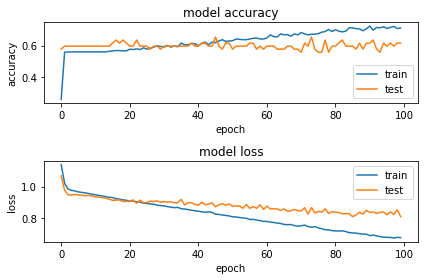

In [93]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

Text(69.0, 0.5, 'True label')

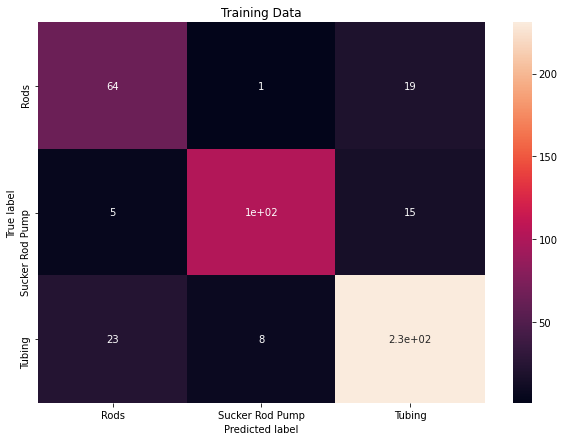

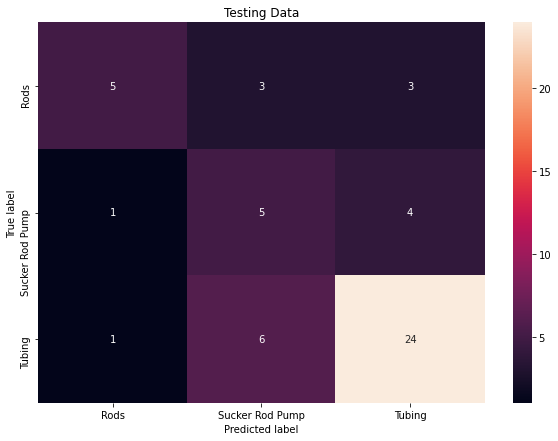

In [89]:
## Check Confusion matrix of Neural Network

# Estimate values for both training and testing data  
y_train_est = np.argmax(model.predict(X_train),axis = 1)
y_train_real = np.argmax(y_train, axis = 1)
y_test_est = np.argmax(model.predict(X_test),axis = 1)
y_test_real = np.argmax(y_test, axis = 1)

# Define Confusion Matrix - Training data
confusion_matrix = np.zeros((3,3))
for i in range(y_train_est.shape[0]):
    estimate = y_train_est[i]
    actual  = y_train_real[i]
    confusion_matrix[actual,estimate] += 1

# Plot Confusion Matrix
df_cm = pd.DataFrame(confusion_matrix, index = [i for i in ['Rods', "Sucker Rod Pump", "Tubing"]],
                  columns = [i for i in ['Rods', "Sucker Rod Pump", "Tubing"]])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.title("Training Data")
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Define Confusion Matrix - Testing data
confusion_matrix = np.zeros((3,3))
for i in range(y_test_est.shape[0]):
    estimate = y_test_est[i]
    actual  = y_test_real[i]
    confusion_matrix[actual,estimate] += 1

# Plot Confusion Matrix
df_cm = pd.DataFrame(confusion_matrix, index = [i for i in ['Rods', "Sucker Rod Pump", "Tubing"]],
                  columns = [i for i in ['Rods', "Sucker Rod Pump", "Tubing"]])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.title("Testing Data")
plt.xlabel('Predicted label')
plt.ylabel('True label')


## Life Expectation Regressor

In [98]:
# Split Traing/testing data
X_train, X_test, y_train, y_test = train_test_split(Rredictor_scaled, Response_lifespan_scaled, test_size=0.10, random_state=77777)

In [101]:
# Define Input and Output shape
input_shape = (Rredictor_scaled.shape[-1],) 
n_class = 1

# Build a Neural Network
model = Sequential()
model.add(Dense(40,activation='relu',input_shape=input_shape))
model.add(Dense(40,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(n_class, activation='sigmoid')) # <- as output has range of [0,1]

# Compile the Neural Network - define Loss and optimizer to tune the associated weights
model.compile(loss='mse', metrics=['mae'], optimizer='adam')

In [102]:
# training the Neural Network and saving metrics every 100 epochs
history = model.fit(X_train, y_train,
          batch_size=50, epochs=100,
          verbose=2,
          validation_data=(X_test, y_test))

Train on 468 samples, validate on 52 samples
Epoch 1/100
468/468 - 0s - loss: 0.0901 - mae: 0.2839 - val_loss: 0.0517 - val_mae: 0.2156
Epoch 2/100
468/468 - 0s - loss: 0.0298 - mae: 0.1493 - val_loss: 0.0093 - val_mae: 0.0822
Epoch 3/100
468/468 - 0s - loss: 0.0147 - mae: 0.0798 - val_loss: 0.0054 - val_mae: 0.0586
Epoch 4/100
468/468 - 0s - loss: 0.0157 - mae: 0.0759 - val_loss: 0.0054 - val_mae: 0.0589
Epoch 5/100
468/468 - 0s - loss: 0.0143 - mae: 0.0747 - val_loss: 0.0060 - val_mae: 0.0631
Epoch 6/100
468/468 - 0s - loss: 0.0138 - mae: 0.0802 - val_loss: 0.0078 - val_mae: 0.0730
Epoch 7/100
468/468 - 0s - loss: 0.0136 - mae: 0.0812 - val_loss: 0.0068 - val_mae: 0.0670
Epoch 8/100
468/468 - 0s - loss: 0.0133 - mae: 0.0787 - val_loss: 0.0067 - val_mae: 0.0667
Epoch 9/100
468/468 - 0s - loss: 0.0130 - mae: 0.0776 - val_loss: 0.0066 - val_mae: 0.0660
Epoch 10/100
468/468 - 0s - loss: 0.0129 - mae: 0.0781 - val_loss: 0.0071 - val_mae: 0.0684
Epoch 11/100
468/468 - 0s - loss: 0.0126 - m

Epoch 90/100
468/468 - 0s - loss: 0.0040 - mae: 0.0483 - val_loss: 0.0062 - val_mae: 0.0656
Epoch 91/100
468/468 - 0s - loss: 0.0036 - mae: 0.0474 - val_loss: 0.0065 - val_mae: 0.0684
Epoch 92/100
468/468 - 0s - loss: 0.0038 - mae: 0.0481 - val_loss: 0.0072 - val_mae: 0.0697
Epoch 93/100
468/468 - 0s - loss: 0.0040 - mae: 0.0491 - val_loss: 0.0053 - val_mae: 0.0609
Epoch 94/100
468/468 - 0s - loss: 0.0038 - mae: 0.0485 - val_loss: 0.0055 - val_mae: 0.0598
Epoch 95/100
468/468 - 0s - loss: 0.0037 - mae: 0.0470 - val_loss: 0.0067 - val_mae: 0.0689
Epoch 96/100
468/468 - 0s - loss: 0.0037 - mae: 0.0480 - val_loss: 0.0060 - val_mae: 0.0662
Epoch 97/100
468/468 - 0s - loss: 0.0036 - mae: 0.0464 - val_loss: 0.0077 - val_mae: 0.0739
Epoch 98/100
468/468 - 0s - loss: 0.0037 - mae: 0.0472 - val_loss: 0.0056 - val_mae: 0.0621
Epoch 99/100
468/468 - 0s - loss: 0.0035 - mae: 0.0464 - val_loss: 0.0058 - val_mae: 0.0627
Epoch 100/100
468/468 - 0s - loss: 0.0033 - mae: 0.0452 - val_loss: 0.0057 - val

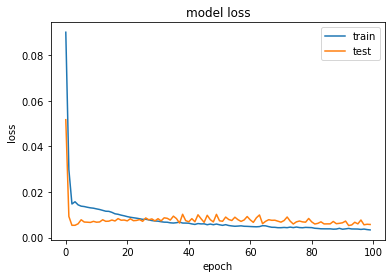

In [103]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [107]:
from sklearn.metrics import mean_squared_error

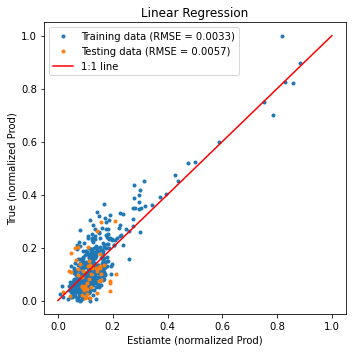

In [110]:
# Estimate values for both training and testing data  
y_train_est = model.predict(X_train)
y_test_est = model.predict(X_test)
# Visualize Prediction performance using True vs. Estiamte plot
plt.figure(figsize = (5,5))
plt.plot(y_train_est, y_train,'.',label = 'Training data (RMSE = %.4f)' %mean_squared_error(y_train, y_train_est))
plt.plot(y_test_est, y_test, '.',label = 'Testing data (RMSE = %.4f)' %mean_squared_error(y_test, y_test_est))
plt.plot([0,1],[0,1],'-r',label = '1:1 line')
plt.title('Linear Regression')
plt.xlabel('Estiamte (normalized Prod)')
plt.ylabel('True (normalized Prod)')
plt.legend()
plt.tight_layout()

# 4. ML - Dimensionality Reduction
* Principal Component Analysis ([PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)) 

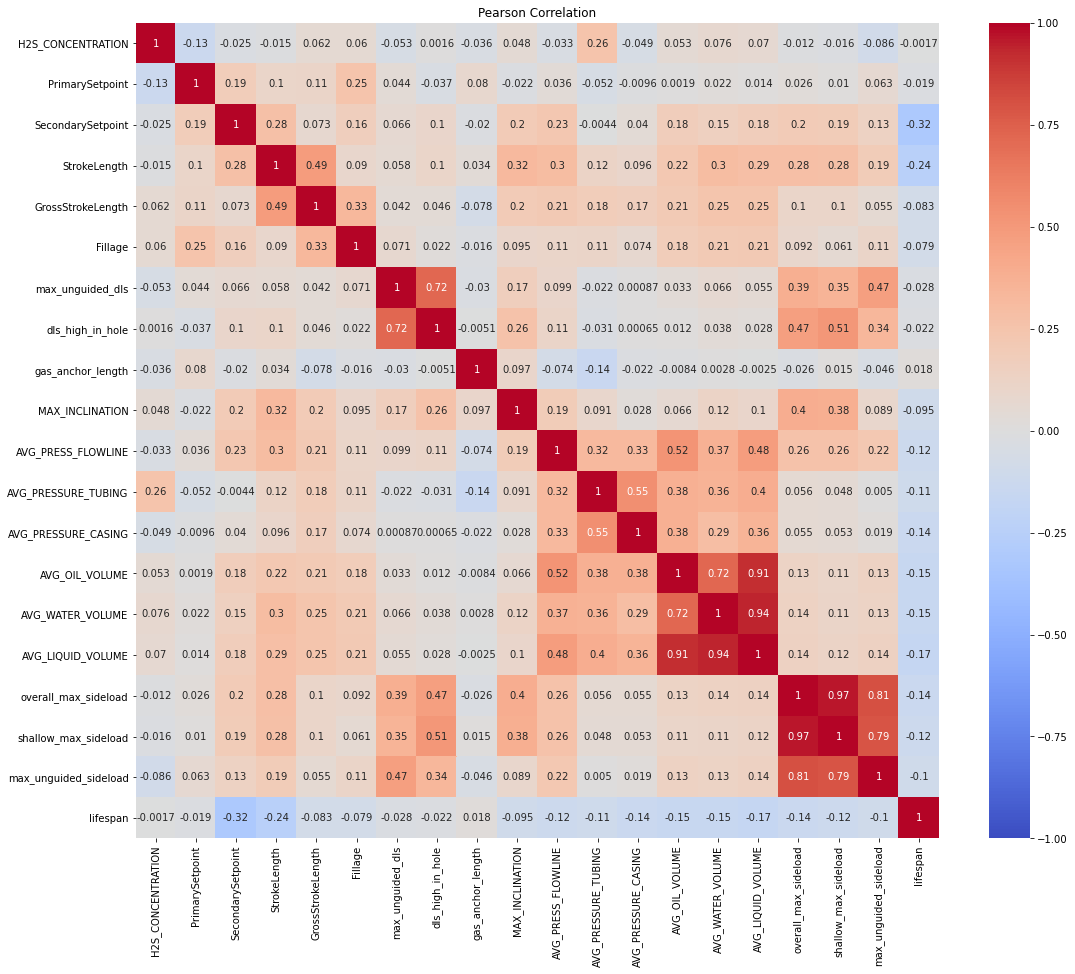

In [115]:
# Corr Coefficient of entire features
list_ = list_predictor_continuous.copy(); list_.append('lifespan')
plt.figure(figsize = (18,15))
plt.title('Pearson Correlation')
sns.heatmap(df.loc[:,list_].corr(method='pearson'), vmin=-1, vmax = 1, cmap='coolwarm', annot=True);


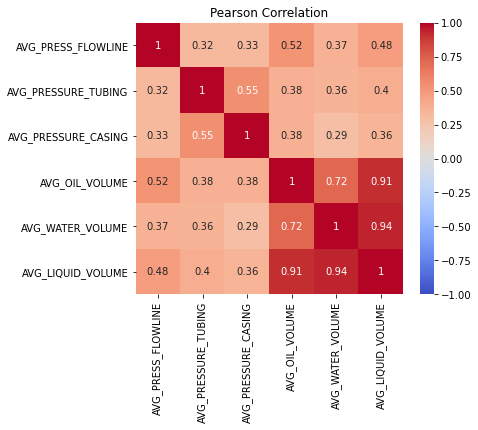

In [116]:
# Subset of the above corr. coefficient matrix
list_ = ['AVG_PRESS_FLOWLINE',
       'AVG_PRESSURE_TUBING', 'AVG_PRESSURE_CASING', 'AVG_OIL_VOLUME',
       'AVG_WATER_VOLUME', 'AVG_LIQUID_VOLUME',]
plt.figure(figsize = (6,5))
plt.title('Pearson Correlation')
sns.heatmap(df.loc[:,list_].corr(method='pearson'), vmin=-1, vmax = 1, cmap='coolwarm', annot=True);


From the above correlation matrix, we observe there are high corrliearity. Here we will decomstrate dimensionality reduction for these 6 features.

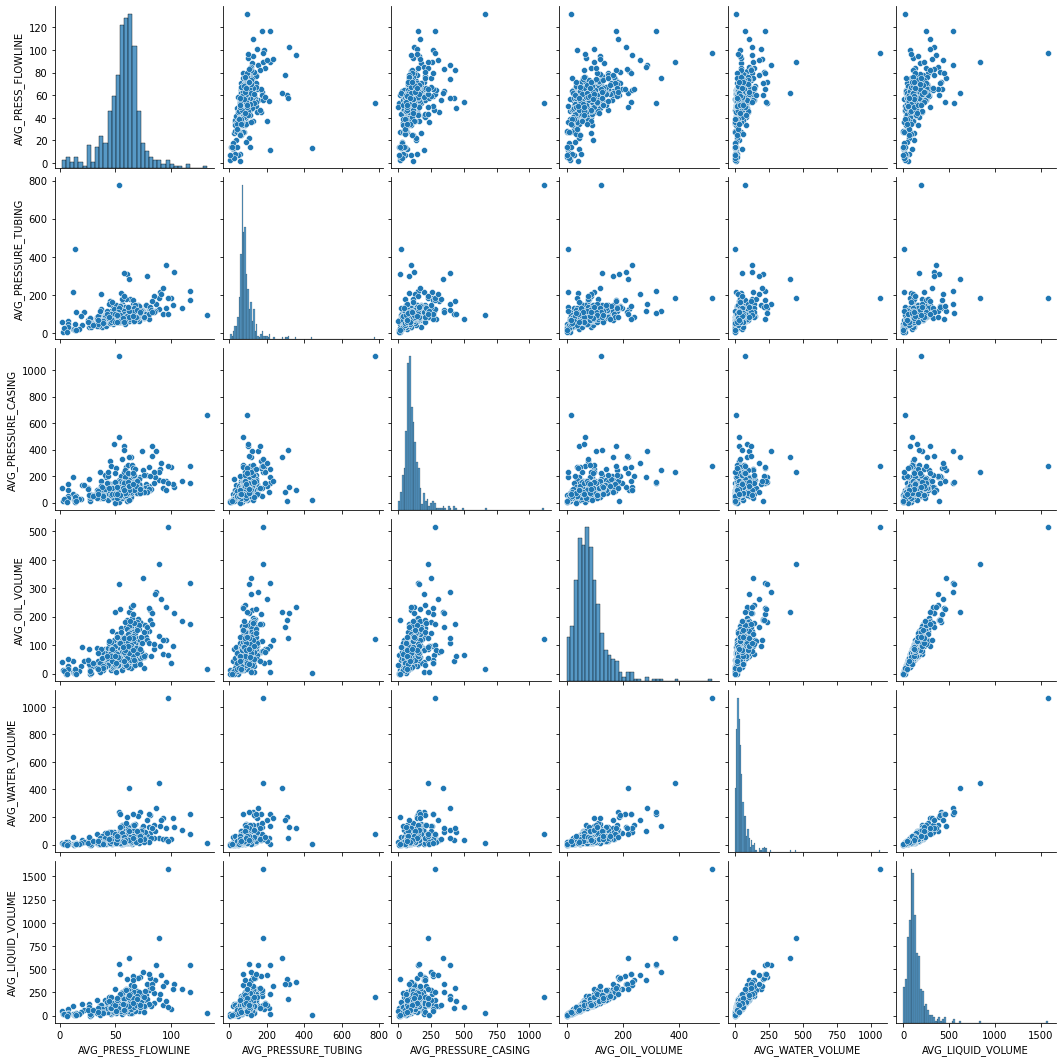

In [117]:
# Select 4 variables from data frame
df_subset_pca = df.loc[:,list_]

# If we visualze pairplot of these variables:
sns.pairplot(df_subset_pca)

# Again, we need to do preprocess data (i.e., Standardization or normalization) before applying PCA
scaler = StandardScaler()
var_std = scaler.fit_transform(df_subset_pca)

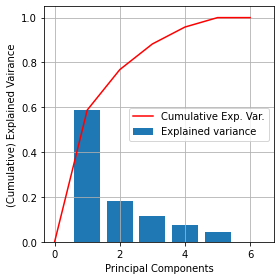

In [119]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(var_std);

# plot explained variance vs. # of PC
plt.figure(figsize = (4,4))
plt.bar(x = np.arange(1,7), height= pca.explained_variance_ratio_, label = 'Explained variance')
cum_ev = [0]; 
for i in range(6):cum_ev.append(sum(pca.explained_variance_ratio_[:i+1])) 
plt.plot(np.arange(0,7), cum_ev, '-r', label = 'Cumulative Exp. Var.')
plt.xlabel('Principal Components')
plt.ylabel('(Cumulative) Explained Vairance')
plt.legend()
plt.grid('on')
plt.tight_layout()

Only with 2 PC, we can explain around 80% information we have. Let's do it with 2 PC.

Text(0.5, 1.0, 'Samples in 2D space')

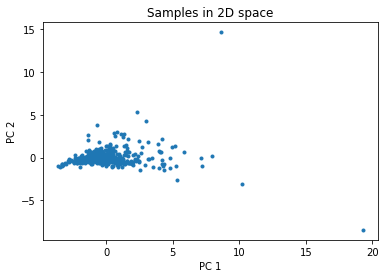

In [120]:
# map 4-dimensional variables to 2D
pca = PCA(n_components=2)
var_std_reduced = pca.fit_transform(var_std);

# Visualizing data in 2D
plt.plot(var_std_reduced[:,0],var_std_reduced[:,1], '.')
plt.xlabel('PC 1'); plt.ylabel('PC 2')
plt.title('Samples in 2D space')

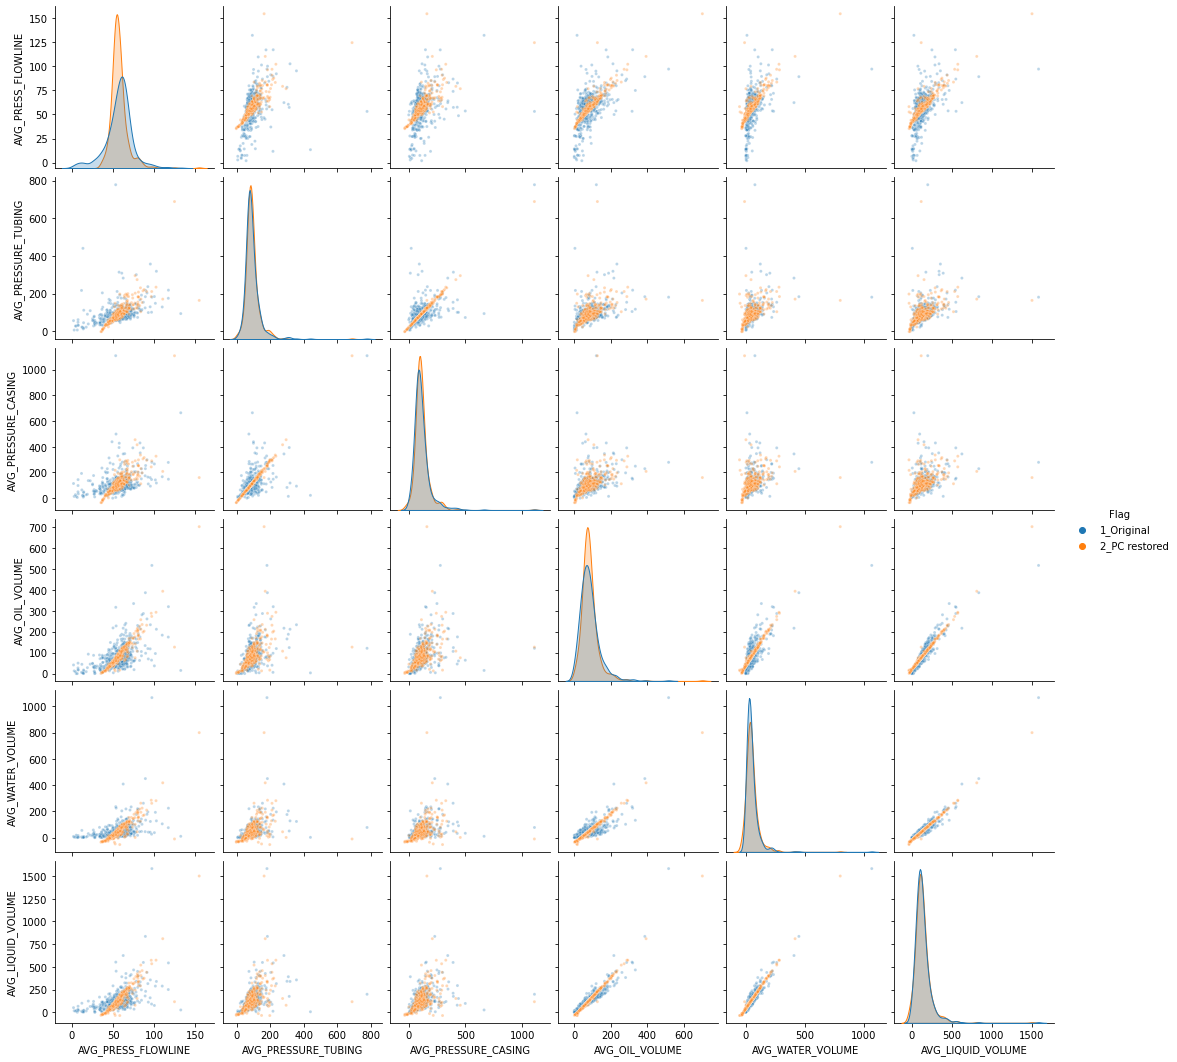

In [122]:
# Restore the reduced dimensionality to the original dimension:
var_std_restore = pca.inverse_transform(var_std_reduced)

# Restore the original scale
var_restore = scaler.inverse_transform(var_std_restore)
df_subset_pca_restore = pd.DataFrame(data = var_restore, columns = list_)

# If we visualze pairplot of the restored variables:
df_subset_pca ['Flag'] = '1_Original'
df_subset_pca_restore ['Flag'] = '2_PC restored'
df_subset_pca_restore = pd.concat([df_subset_pca, df_subset_pca_restore])
sns.pairplot(df_subset_pca_restore, plot_kws = dict(alpha = 0.3, marker = '.'), hue='Flag')

# 5. ML - Clustering
* [K-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) - make clusters to make euclidean distances (i.e., **inertia**) among samples in each cluster minimized. Hyperparameter = # of cluster

Let's apply clustering to sample in 2D space. We had

Text(0.5, 1.0, 'Samples in 2D space')

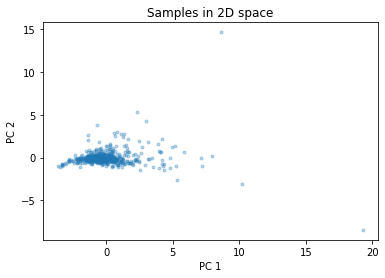

In [123]:
# Visualizing data in 2D
plt.plot(var_std_reduced[:,0],var_std_reduced[:,1], '.', alpha = 0.3)
plt.xlabel('PC 1'); plt.ylabel('PC 2')
plt.title('Samples in 2D space')

Text(0.5, 1.0, 'Samples in 2D space')

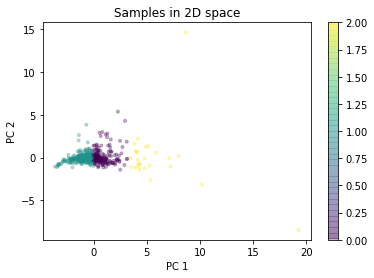

In [124]:
# Apply Kmeans clustering to PC reduced samples
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(var_std_reduced)
cluster_label = kmeans.predict(var_std_reduced)

plt.scatter(var_std_reduced[:,0],var_std_reduced[:,1], alpha = 0.3, marker='.', c = cluster_label)
plt.xlabel('PC 1'); plt.ylabel('PC 2')
plt.colorbar()
plt.title('Samples in 2D space')

How can we select best # of cluster in Kmeans? we should check loss of Kmeans with varying # cluster

Text(0.5, 1.0, 'Select the optimum # of cluster')

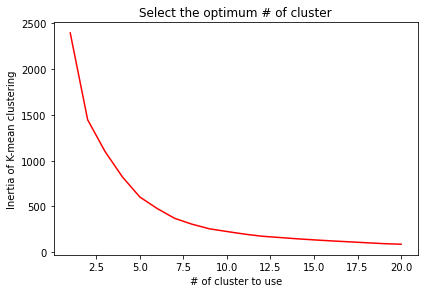

In [125]:
Inertia_ = [] # <- we will save Loss of K means here
for i in range(1,21):
    kmeans = KMeans(n_clusters = i).fit(var_std_reduced)
    Inertia_.append(kmeans.inertia_)

plt.plot(np.arange(1,21), Inertia_, '-r')
plt.xlabel('# of cluster to use')
plt.ylabel('Inertia of K-mean clustering')
plt.tight_layout()
plt.title('Select the optimum # of cluster')

Text(0.5, 1.0, 'Samples in 2D space')

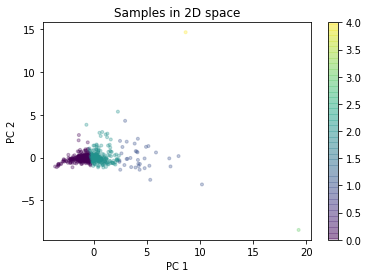

In [126]:
# Let's apply 5 clusters
kmeans = KMeans(n_clusters = 5)
cluster_label = kmeans.fit_predict(var_std_reduced)
plt.scatter(var_std_reduced[:,0],var_std_reduced[:,1], alpha = 0.3, marker='.', c = cluster_label)
plt.xlabel('PC 1'); plt.ylabel('PC 2')
plt.colorbar()
plt.title('Samples in 2D space')